In [59]:
import numpy as np
import util
import matplotlib.pyplot as plt

In [66]:
class PoissonRegression:
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, step_size=1e-5, max_iter=10000000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta_0 = theta_0 
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

        
    def h_x(self, x, theta):
        """Return h_theta(x) for Poisson Regression (the canonical response function)"""
        return np.power(np.e, x @ theta)
        
    def normalise(self, x):
        x[:, 3] = (x[:, 3] - np.mean(x[:, 3]))/np.std(x[:, 3])
        x[:, 4] = (x[:, 4] - np.mean(x[:, 4]))/np.std(x[:, 4])
        return x
    
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        y = y.reshape((-1, 1))
#         x = self.normalise(x)
        self.theta = self.theta_0 if self.theta_0 is not None else np.zeros((x.shape[1], 1))
        
        prev_theta = self.theta
        for iter in range(self.max_iter):
            theta_update = self.step_size*((y-self.h_x(x, self.theta)).T @ x)
            self.theta = self.theta + theta_update.T
            delta_theta = self.theta - prev_theta
            norm = np.sqrt(np.sum(np.power(delta_theta, 2)))
            if norm < self.eps:
                break
            prev_theta = self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Floating-point prediction for each input, shape (n_examples,).
        """
        # *** START CODE HERE ***
#         x = self.normalise(x)
        return self.h_x(x, self.theta)
        # *** END CODE HERE ***

# if __name__ == '__main__':
#     main(lr=1e-5,
#         train_path='train.csv',
#         eval_path='valid.csv',
#         save_path='poisson_pred.txt')


In [90]:
def main(lr, train_path, eval_path, save_path):
    """Problem: Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        save_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    # *** START CODE HERE ***
    # Fit a Poisson Regression model
    poisson_model = PoissonRegression()
    poisson_model.fit(x_train, y_train)
    # Run on the validation set, and use np.savetxt to save outputs to save_path
    x_valid, y_valid = util.load_dataset(eval_path, add_intercept=True)
    y_valid_pred = poisson_model.predict(x_valid)
    np.savetxt(save_path, y_valid_pred)
    
    plt.figure()
    plt.plot(np.linspace(0, 26, len(y_valid)), np.linspace(0, 26, len(y_valid)), color='r', label='y = x')
    plt.scatter(y_valid, y_valid_pred, label='true vs. predicted')
    plt.legend()
    plt.xlabel('true y values')
    plt.ylabel('predicted y values')
    plt.savefig('true_vs_predicted_valid.jpg')
    plt.show()
    # *** END CODE HERE ***

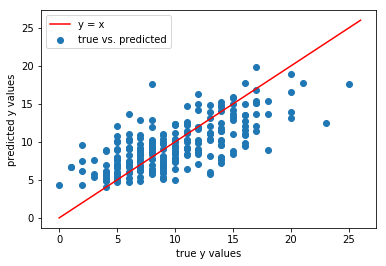

In [91]:
main(lr=1e-5,
     train_path='train.csv',
     eval_path='valid.csv',
     save_path='poisson_pred.txt')